### Loading the csv files

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mon = pd.read_csv('monday.csv', sep=';', parse_dates=[0])
tue = pd.read_csv('tuesday.csv', sep=';', parse_dates=[0])
wed = pd.read_csv('wednesday.csv', sep=';', parse_dates=[0])
thu = pd.read_csv('thursday.csv', sep=';', parse_dates=[0])
fri = pd.read_csv('friday.csv', sep=';', parse_dates=[0])


In [3]:
def fe_matrix(day):
    '''add the checkout to the customers who miss it and
    assign unique identifiers for customers over the week'''
    #find the missing checkouts
    chkt = pd.DataFrame(data=day['customer_no'].value_counts() == 1)
    lst = list(chkt[chkt['customer_no']==True].index)
    
    #append the new rows for missing checkouts
    mnt = day['timestamp'].max()+datetime.timedelta(minutes=1)
    count = 0
    for i in range(len(lst)):
        day.loc[len(day)+count] = [mnt,lst[i],'checkout']
        count = count+1
        
        
    #update the customer columns adding the weekly day
    lst2 = ['m_','tu_','w_','th_','fr_']
    wd = day.timestamp[1].weekday()
    day['cust_id'] = lst2[wd]+day['customer_no'].astype('str')
   
    return day

In [4]:
mon = fe_matrix(mon)
tue = fe_matrix(tue)
wed = fe_matrix(wed)
thu = fe_matrix(thu)
fri = fe_matrix(fri)
df = pd.concat([mon,tue,wed,thu,fri],ignore_index=True) 
df.set_index('timestamp', inplace=True)

### Expanding table's column


In [5]:
df.sort_index(inplace=True)
df['time'] = df.index.time 
df['day'] = df.index.day_name()
df

,customer_no,location,cust_id,time,day
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,m_1,07:03:00,Monday
2019-09-02 07:03:00,2,dairy,m_2,07:03:00,Monday
2019-09-02 07:04:00,3,dairy,m_3,07:04:00,Monday
2019-09-02 07:04:00,4,dairy,m_4,07:04:00,Monday
2019-09-02 07:04:00,5,spices,m_5,07:04:00,Monday
...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,fr_1509,21:50:00,Friday
2019-09-06 21:50:00,1510,spices,fr_1510,21:50:00,Friday
2019-09-06 21:51:00,1509,checkout,fr_1509,21:51:00,Friday


### Determining the order of states

In [6]:
# finding the min of time in order to indicate the visited first aile of each customer into the supermarket
first_section = df.reset_index().groupby('cust_id')['timestamp'].min()


In [7]:
for customer in df["cust_id"].unique():
    df.loc[
        (df['cust_id'] == customer) & (df.index == first_section[customer]),
        "section_order"
    ] = "first"

In [8]:
df.loc[df["location"] == "checkout", "section_order"] = "checkout"

In [9]:
df

,customer_no,location,cust_id,time,day,section_order
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,m_1,07:03:00,Monday,first
2019-09-02 07:03:00,2,dairy,m_2,07:03:00,Monday,first
2019-09-02 07:04:00,3,dairy,m_3,07:04:00,Monday,first
2019-09-02 07:04:00,4,dairy,m_4,07:04:00,Monday,first
2019-09-02 07:04:00,5,spices,m_5,07:04:00,Monday,first
...,...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,fr_1509,21:50:00,Friday,first
2019-09-06 21:50:00,1510,spices,fr_1510,21:50:00,Friday,first
2019-09-06 21:51:00,1509,checkout,fr_1509,21:51:00,Friday,checkout


In [10]:
df['section_order'].fillna('following', inplace=True)

In [11]:
df

,customer_no,location,cust_id,time,day,section_order
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,m_1,07:03:00,Monday,first
2019-09-02 07:03:00,2,dairy,m_2,07:03:00,Monday,first
2019-09-02 07:04:00,3,dairy,m_3,07:04:00,Monday,first
2019-09-02 07:04:00,4,dairy,m_4,07:04:00,Monday,first
2019-09-02 07:04:00,5,spices,m_5,07:04:00,Monday,first
...,...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,fr_1509,21:50:00,Friday,first
2019-09-06 21:50:00,1510,spices,fr_1510,21:50:00,Friday,first
2019-09-06 21:51:00,1509,checkout,fr_1509,21:51:00,Friday,checkout


### Calculating the probabilities for the first section

In [12]:
customers_in_first_sections = (
    df[df.section_order == 'first'].groupby('location')[['cust_id']].count()
)
customers_in_first_sections

,cust_id
location,
dairy,2141
drinks,1143
fruit,2810
spices,1351


In [13]:
total_entries = sum(customers_in_first_sections['cust_id'].to_list())
first_probabilities = customers_in_first_sections / total_entries
first_probabilities

,cust_id
location,
dairy,0.287576
drinks,0.153526
fruit,0.377435
spices,0.181464


### 1. The total number of customers in each section

In [14]:
section_sum = df.groupby('location')[['cust_id']].count().sort_values('cust_id')
section_sum

,cust_id
location,
spices,3754
drinks,3905
dairy,4679
fruit,5122
checkout,7426


In [15]:
# daily average of customer per section
section_avg = round(section_sum / 5, 0).astype(int)
section_avg

,cust_id
location,
spices,751
drinks,781
dairy,936
fruit,1024
checkout,1485


### 2. Number of customer per section over time

In [16]:
df.groupby(['time', 'location'])[['cust_id']].count()

cust_id
time     location         
07:00:00 dairy           3
         drinks          3
         fruit           4
07:01:00 checkout        2
         dairy           4
...                    ...
21:50:00 dairy           3
         drinks          1
         fruit           2
         spices          1
21:51:00 checkout        7

[4384 rows x 1 columns]

In [17]:
# Average customer per section per minute
avg_customers_section = df.groupby(['time', 'location'])[['cust_id']].count()/5
avg_customers_section

cust_id
time     location         
07:00:00 dairy         0.6
         drinks        0.6
         fruit         0.8
07:01:00 checkout      0.4
         dairy         0.8
...                    ...
21:50:00 dairy         0.6
         drinks        0.2
         fruit         0.4
         spices        0.2
21:51:00 checkout      1.4

[4384 rows x 1 columns]

In [18]:
# total number of customers per timestamp and location
customers_section = df.groupby([df.index, 'location'])[['cust_id']].count()
customers_section

cust_id
timestamp           location         
2019-09-02 07:03:00 dairy           2
2019-09-02 07:04:00 dairy           2
                    fruit           1
                    spices          3
2019-09-02 07:05:00 checkout        2
...                               ...
2019-09-06 21:50:00 dairy           1
                    drinks          1
                    fruit           1
                    spices          1
2019-09-06 21:51:00 checkout        3

[13842 rows x 1 columns]

### 3. Number of customers at checkout over time

In [19]:
# daily number of customers at checkout over the time
checkout = df[df['location'] == 'checkout']
checkout.groupby(['timestamp', 'location'])[['cust_id']].count()

,,cust_id
timestamp,location,
2019-09-02 07:05:00,checkout,2
2019-09-02 07:06:00,checkout,2
2019-09-02 07:07:00,checkout,1
2019-09-02 07:08:00,checkout,3
2019-09-02 07:09:00,checkout,1
...,...,...
2019-09-06 21:45:00,checkout,1
2019-09-06 21:47:00,checkout,2
2019-09-06 21:48:00,checkout,2


In [20]:
# daily number of customers at checkout over the time
checkout.groupby(['time', 'location'])[['cust_id']].count()/5

,,cust_id
time,location,
07:01:00,checkout,0.4
07:02:00,checkout,1.0
07:03:00,checkout,0.2
07:04:00,checkout,0.4
07:05:00,checkout,1.4
...,...,...
21:47:00,checkout,1.0
21:48:00,checkout,1.4
21:49:00,checkout,1.2


### 4. Time spent in the supermarket

In [21]:
# making a df with customer_id and time at first section
first_section = df.reset_index()[['timestamp', 'cust_id']].groupby('cust_id').min()
first_section.rename(columns={'timestamp': 'entrance_time'}, inplace=True)
first_section.sort_values('entrance_time')

,entrance_time
cust_id,
m_1,2019-09-02 07:03:00
m_2,2019-09-02 07:03:00
m_4,2019-09-02 07:04:00
m_3,2019-09-02 07:04:00
m_5,2019-09-02 07:04:00
...,...
fr_1506,2019-09-06 21:48:00
fr_1507,2019-09-06 21:48:00
fr_1508,2019-09-06 21:48:00


In [22]:
# making a df with customer_id and time at last section
last_section = df.reset_index()[['timestamp', 'cust_id']].groupby('cust_id').max()
last_section.rename(columns={'timestamp': 'exit_time'}, inplace=True)
last_section.sort_values('exit_time')

,exit_time
cust_id,
m_1,2019-09-02 07:05:00
m_5,2019-09-02 07:05:00
m_3,2019-09-02 07:06:00
m_2,2019-09-02 07:06:00
m_8,2019-09-02 07:07:00
...,...
fr_1496,2019-09-06 21:50:00
fr_1507,2019-09-06 21:50:00
fr_1510,2019-09-06 21:51:00


In [23]:
time_in_market = pd.concat([first_section, last_section], axis=1)
time_in_market['total_time'] = (time_in_market['exit_time'] - time_in_market['entrance_time'])
time_in_market.sort_values('entrance_time')

,entrance_time,exit_time,total_time
cust_id,,,
m_1,2019-09-02 07:03:00,2019-09-02 07:05:00,0 days 00:02:00
m_2,2019-09-02 07:03:00,2019-09-02 07:06:00,0 days 00:03:00
m_4,2019-09-02 07:04:00,2019-09-02 07:08:00,0 days 00:04:00
m_3,2019-09-02 07:04:00,2019-09-02 07:06:00,0 days 00:02:00
m_5,2019-09-02 07:04:00,2019-09-02 07:05:00,0 days 00:01:00
...,...,...,...
fr_1506,2019-09-06 21:48:00,2019-09-06 21:51:00,0 days 00:03:00
fr_1507,2019-09-06 21:48:00,2019-09-06 21:50:00,0 days 00:02:00
fr_1508,2019-09-06 21:48:00,2019-09-06 21:50:00,0 days 00:02:00


### 5. Total number of customers present in the supermarket over time

In [24]:
df

,customer_no,location,cust_id,time,day,section_order
timestamp,,,,,,
2019-09-02 07:03:00,1,dairy,m_1,07:03:00,Monday,first
2019-09-02 07:03:00,2,dairy,m_2,07:03:00,Monday,first
2019-09-02 07:04:00,3,dairy,m_3,07:04:00,Monday,first
2019-09-02 07:04:00,4,dairy,m_4,07:04:00,Monday,first
2019-09-02 07:04:00,5,spices,m_5,07:04:00,Monday,first
...,...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,fr_1509,21:50:00,Friday,first
2019-09-06 21:50:00,1510,spices,fr_1510,21:50:00,Friday,first
2019-09-06 21:51:00,1509,checkout,fr_1509,21:51:00,Friday,checkout


#### Tracking the location of each customer per minute
Special Thanks to Paul and Stefan

In [25]:
df_final = df.groupby(['cust_id']).resample('min').ffill()

Checking the old and new data to see if it works 
It works perfectly -> I would add billions of happy emojies but I don't know how

In [26]:
df[df['cust_id'] == 'fr_1']

,customer_no,location,cust_id,time,day,section_order
timestamp,,,,,,
2019-09-06 07:00:00,1,dairy,fr_1,07:00:00,Friday,first
2019-09-06 07:04:00,1,spices,fr_1,07:04:00,Friday,following
2019-09-06 07:05:00,1,checkout,fr_1,07:05:00,Friday,checkout


In [27]:
df_final[df_final['cust_id'] == 'fr_1']

customer_no  location cust_id      time     day  \
cust_id timestamp                                                              
fr_1    2019-09-06 07:00:00            1     dairy    fr_1  07:00:00  Friday   
        2019-09-06 07:01:00            1     dairy    fr_1  07:00:00  Friday   
        2019-09-06 07:02:00            1     dairy    fr_1  07:00:00  Friday   
        2019-09-06 07:03:00            1     dairy    fr_1  07:00:00  Friday   
        2019-09-06 07:04:00            1    spices    fr_1  07:04:00  Friday   
        2019-09-06 07:05:00            1  checkout    fr_1  07:05:00  Friday   

                            section_order  
cust_id timestamp                          
fr_1    2019-09-06 07:00:00         first  
        2019-09-06 07:01:00         first  
        2019-09-06 07:02:00         first  
        2019-09-06 07:03:00         first  
        2019-09-06 07:04:00     following  
        2019-09-06 07:05:00      checkout

In [28]:
df_final

customer_no  location cust_id      time  \
cust_id timestamp                                                      
fr_1    2019-09-06 07:00:00            1     dairy    fr_1  07:00:00   
        2019-09-06 07:01:00            1     dairy    fr_1  07:00:00   
        2019-09-06 07:02:00            1     dairy    fr_1  07:00:00   
        2019-09-06 07:03:00            1     dairy    fr_1  07:00:00   
        2019-09-06 07:04:00            1    spices    fr_1  07:04:00   
...                                  ...       ...     ...       ...   
w_998   2019-09-04 16:57:00          998     fruit   w_998  16:57:00   
        2019-09-04 16:58:00          998     fruit   w_998  16:57:00   
        2019-09-04 16:59:00          998  checkout   w_998  16:59:00   
w_999   2019-09-04 16:53:00          999     fruit   w_999  16:53:00   
        2019-09-04 16:54:00          999  checkout   w_999  16:54:00   

                                   day section_order  
cust_id timestamp                                     
fr_1    2019-09-06 07:00:00     Friday         first  
        2019-09-06 07:01:00     Friday         first  
        2019-09-06 07:02:00     Friday         first  
        2019-09-06 07:03:00     Friday         first  
        2019-09-06 07:04:00     Friday     following  
...                                ...           ...  
w_998   2019-09-04 16:57:00  Wednesday     following  
        2019-09-04 16:58:00  Wednesday     following  
        2019-09-04 16:59:00  Wednesday      checkout  
w_999   2019-09-04 16:53:00  Wednesday         first  
        2019-09-04 16:54:00  Wednesday      checkout  

[53921 rows x 6 columns]

In [29]:
df_final.reset_index(inplace=True, level=0, drop=True)

In [47]:
df_final

,customer_no,location,cust_id,time,day,section_order,revenue
timestamp,,,,,,,
2019-09-02 07:03:00,1,dairy,m_1,07:03:00,Monday,first,5
2019-09-02 07:03:00,2,dairy,m_2,07:03:00,Monday,first,5
2019-09-02 07:04:00,1,dairy,m_1,07:03:00,Monday,first,5
2019-09-02 07:04:00,2,dairy,m_2,07:03:00,Monday,first,5
2019-09-02 07:04:00,3,dairy,m_3,07:04:00,Monday,first,5
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,fr_1509,21:50:00,Friday,first,6
2019-09-06 21:50:00,1510,spices,fr_1510,21:50:00,Friday,first,3
2019-09-06 21:51:00,1506,checkout,fr_1506,21:51:00,Friday,checkout,0


### 6. Plotting the distribution of customers of their first visited section versus following sections

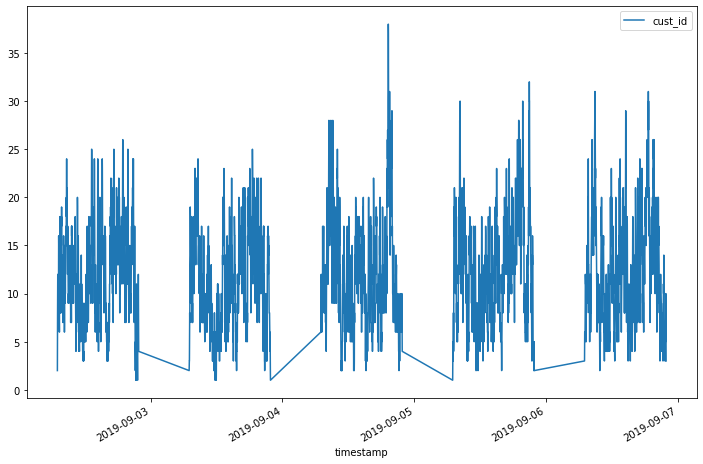

In [48]:
df_final.groupby(df_final.index)[['cust_id']].count().plot(figsize=(12,8));

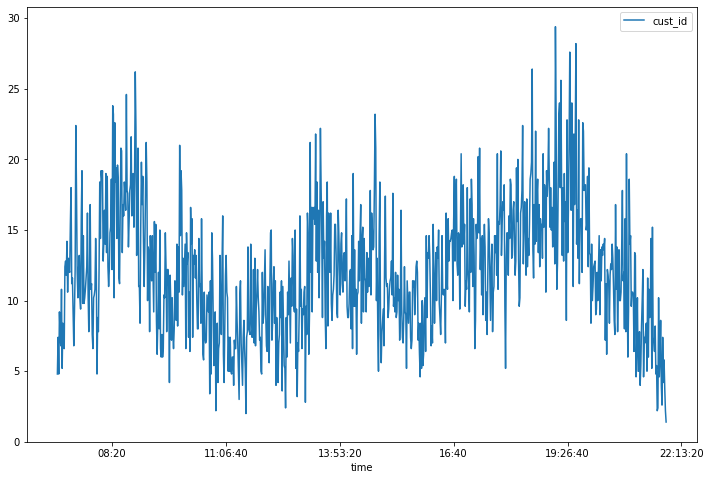

In [49]:
(df_final.groupby(df_final['time'])[["cust_id"]].count() / 5).plot(figsize=(12, 8));

In [50]:
first = (
    df_final[df_final["section_order"] == "first"]
    .groupby(["time"])[["cust_id"]]
    .count()
    / 5
)
following = (
    df_final[df_final["section_order"] == "following"]
    .groupby(["time"])[["cust_id"]]
    .count()
    / 5
)


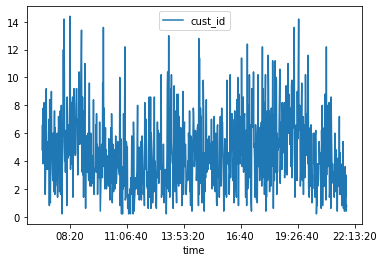

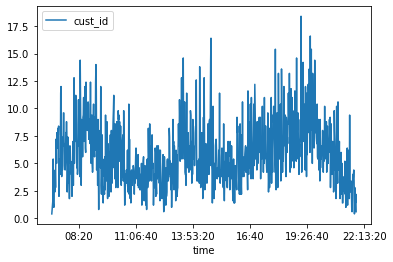

In [51]:
first.plot()
following.plot();

### Adding Revenue to the table

In [52]:
revenues = pd.DataFrame(
    {"location": ["fruit", "spices", "dairy", "drinks"], "revenue": [4, 3, 5, 6]}
)
revenues

,location,revenue
0,fruit,4
1,spices,3
2,dairy,5
3,drinks,6


In [53]:
df_final.loc[df_final["location"] == "fruit", "revenue"] = "4"
df_final.loc[df_final["location"] == "spices", "revenue"] = "3"
df_final.loc[df_final["location"] == "dairy", "revenue"] = "5"
df_final.loc[df_final["location"] == "drinks", "revenue"] = "6"
df_final.loc[df_final["location"] == "checkout", "revenue"] = "0"

In [54]:
df_final["revenue"] = df_final["revenue"].astype(int)

In [55]:
df_final

,customer_no,location,cust_id,time,day,section_order,revenue
timestamp,,,,,,,
2019-09-02 07:03:00,1,dairy,m_1,07:03:00,Monday,first,5
2019-09-02 07:03:00,2,dairy,m_2,07:03:00,Monday,first,5
2019-09-02 07:04:00,1,dairy,m_1,07:03:00,Monday,first,5
2019-09-02 07:04:00,2,dairy,m_2,07:03:00,Monday,first,5
2019-09-02 07:04:00,3,dairy,m_3,07:04:00,Monday,first,5
...,...,...,...,...,...,...,...
2019-09-06 21:50:00,1509,drinks,fr_1509,21:50:00,Friday,first,6
2019-09-06 21:50:00,1510,spices,fr_1510,21:50:00,Friday,first,3
2019-09-06 21:51:00,1506,checkout,fr_1506,21:51:00,Friday,checkout,0


### Transition Matrix

In [64]:
df_final = df_final.sort_values(["timestamp", "cust_id"])
df_final.to_csv('clean_final.csv')

In [57]:
df_final[df_final["cust_id"] == "m_6"]

,customer_no,location,cust_id,time,day,section_order,revenue
timestamp,,,,,,,
2019-09-02 07:04:00,6,spices,m_6,07:04:00,Monday,first,3
2019-09-02 07:05:00,6,dairy,m_6,07:05:00,Monday,following,5
2019-09-02 07:06:00,6,dairy,m_6,07:05:00,Monday,following,5
2019-09-02 07:07:00,6,dairy,m_6,07:05:00,Monday,following,5
2019-09-02 07:08:00,6,dairy,m_6,07:05:00,Monday,following,5
2019-09-02 07:09:00,6,dairy,m_6,07:05:00,Monday,following,5
2019-09-02 07:10:00,6,dairy,m_6,07:05:00,Monday,following,5
2019-09-02 07:11:00,6,dairy,m_6,07:05:00,Monday,following,5
2019-09-02 07:12:00,6,dairy,m_6,07:05:00,Monday,following,5


In [58]:
pre_crosstab = (
    df_final.reset_index()
    .set_index("cust_id")
    .sort_values(["customer_no", "timestamp"])
)

In [59]:
pre_crosstab["next_location"] = pre_crosstab["location"].shift(-1)

In [ ]:
pre_crosstab_final = pre_crosstab[pre_crosstab["location"] != "checkout"].copy()
pre_crosstab_final

In [60]:
P_w_checkout = pd.crosstab(
    pre_crosstab["location"], pre_crosstab["next_location"], normalize=0
)

In [62]:
P = pd.crosstab(
    pre_crosstab["location"], pre_crosstab["next_location"], normalize=0
)

In [63]:
P

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,0.000000,0.287811,0.152997,0.377778,0.181414
dairy,0.102930,0.736824,0.058777,0.049947,0.051521
drinks,0.215608,0.010899,0.598602,0.087909,0.086983
fruit,0.201149,0.095972,0.054830,0.597310,0.050739
spices,0.150048,0.193533,0.163428,0.090953,0.402039
